In [23]:
import os
import numpy as np
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
%matplotlib inline

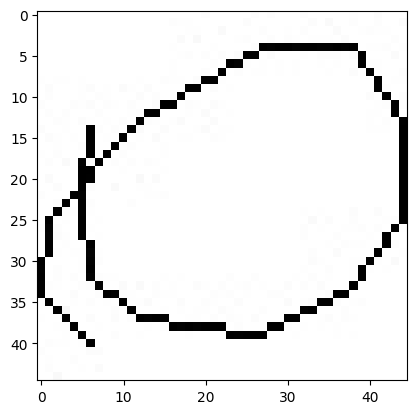

In [24]:
# Read the image
I = cv2.imread('0_49.jpg')
plt.imshow(I[...,::-1])

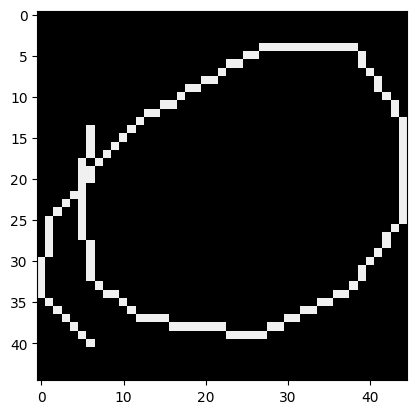

In [25]:
# Cut out the foreground layer
foreground = I.copy()
foreground[foreground<=5] = 240 # swap black and white colour channels
foreground[foreground>240] = 0 # Setting surrounding pixels to zero
plt.imshow(foreground)

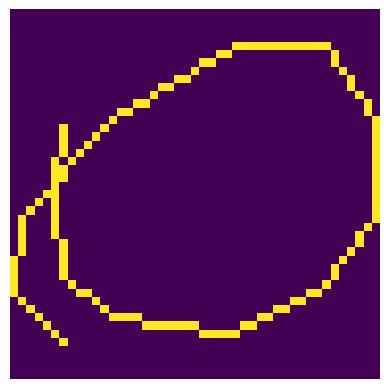

In [27]:
# Create a mask for this new foreground object
def getForegroundMask(foreground):
    mask_new = foreground.copy()[:,:,0]
    mask_new[mask_new>0] = 1
    return mask_new

mask_new = getForegroundMask(foreground)
plt.imshow(mask_new)
plt.axis('off')
plt.show()

In [80]:
import helper